# CODIGOS PARA OBTENER EL LIKELIHOOD Y EL POSTERIOR DE UN CONJUNTO DE DATOS

In [1]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
import scipy.optimize as op
import corner
plt.style.use('classic')

In [2]:
a = 3
b = 2
n = 15
xor = np.linspace(0,2,15)
yor = a*xor + b

In [11]:
def line(x, m, b):
    return(m*x + b)

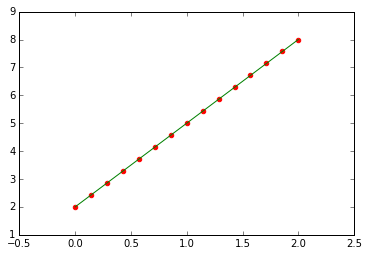

In [12]:
# Graficamos un conjuntp de datos
plt.plot(xor,line(xor,3,2), color='green')
plt.scatter(xor, yor, color='red')

In [13]:
sigma = 0.2
error = np.random.uniform(low=-sigma, high=sigma, size=15)

In [17]:
ydat = yor + error

<function matplotlib.pyplot.show(*args, **kw)>

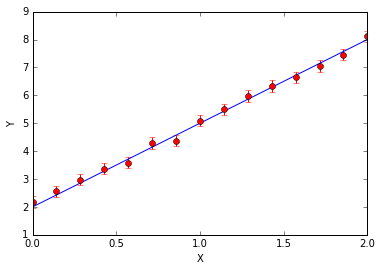

In [18]:
fig, ax = plt.subplots()
ax.errorbar(xor, ydat, yerr=sigma,fmt='o', c='red')
plt.plot(xor, yor, c='blue', label='ORIGINAL')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

In [19]:
def lnlh(theta):
    modelo=line(xor, theta[0],theta[1])
    diferencia = data - modelo
    u=0
    u = np.dot(diferencia, 0.2)
    u = np.dot(u,diferencia.T)
    u = -0.5 * np.sum(u)
    return u

def Markov(theta1, thetap):
    p1 = lnlh(theta1)
    pp = lnlh(thetap)
    if(pp>p1):
        return thetap
    else:
        w = np.random.rand()
        if(pp-p1>np.log(w)):
            return thetap
        else:
            return theta1
    return

def priors(pars, plist):
    Omega_m, h = pars
    if plist[0]<Omega_m<plist[1] and plist[2]<h<plist[3]:
        return 0.0
    return -np.inf


def log_post(pars,z,data,cov,plist):
    prior = priors(pars,plist)
    if not np.isfinite(prior):
        return -np.inf
    return prior + lnlh(pars,z,data,cov)

In [20]:
Nmuestras = 10000
sigma1 = 0.1
sigma2 = 0.1

Ncadenas = 8
thetainicio = [5,0.1]
cadenas = []

for j in range(Ncadenas):
    thetainicio = np.array([np.random.normal(np.random.uniform(5, .100), sigma1), np.random.normal(thetainicio[1], sigma2)])
    for i in range(Nmuestras):
        if i==0:
            cadena = thetainicio
        else:
            thetat = np.array([np.random.normal(thetainicio[0], sigma1), np.random.normal(thetainicio[1], sigma2)])
            thetanuevo = Markov(thetainicio, thetat)
            cadena = np.vstack((cadena, thetanuevo))
            thetainicio = thetanuevo
    if j==0:
        cadenas = cadena
    else:
        cadenas = np.vstack((cadenas, cadena))

In [21]:
x1 = cadenas[0:Nmuestras,0]
y1 = cadenas[0:Nmuestras,1]
x2 = cadenas[Nmuestras+1:Nmuestras*2,0]
y2 = cadenas[Nmuestras+1:Nmuestras*2,1]
x3 = cadenas[2*Nmuestras+1:Nmuestras*3,0]
y3 = cadenas[2*Nmuestras+1:Nmuestras*3,1]
x4 = cadenas[3*Nmuestras+1:Nmuestras*4,0]
y4 = cadenas[3*Nmuestras+1:Nmuestras*4,1]
x5 = cadenas[4*Nmuestras+1:Nmuestras*5,0]
y5 = cadenas[4*Nmuestras+1:Nmuestras*5,1]
x6 = cadenas[5*Nmuestras+1:Nmuestras*6,0]
y6 = cadenas[5*Nmuestras+1:Nmuestras*6,1]
x7 = cadenas[6*Nmuestras+1:Nmuestras*7,0]
y7 = cadenas[6*Nmuestras+1:Nmuestras*7,1]
x8 = cadenas[7*Nmuestras+1:Nmuestras*8,0]
y8 = cadenas[7*Nmuestras+1:Nmuestras*8,1]

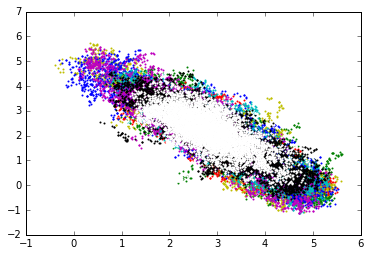

In [22]:
plt.scatter(x1, y1, color = 'g',s=1)
plt.scatter(x2, y2, color = 'r',s=1)
plt.scatter(x3, y3, color = 'y',s=1)
plt.scatter(x4, y4, color = 'b',s=1)
plt.scatter(x5, y5, color = 'c',s=1)
plt.scatter(x6, y6, color = 'm',s=1)
plt.scatter(x7, y7, color = 'k',s=1)
plt.scatter(x8, y8, color = 'w',s=1)

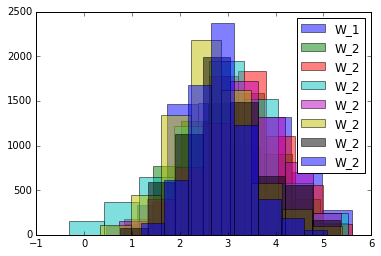

In [23]:
nb = 8
plt.hist(x1[int(Nmuestras/3):], alpha = 0.5, label = 'W_1', bins=nb)
plt.hist(x2[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x3[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x4[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x5[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x6[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x7[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(x8[int(Nmuestras/3):], alpha = 0.5, label = 'W_2', bins=nb)

plt.legend()

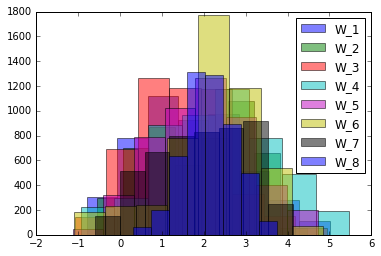

In [24]:
nb = 8

plt.hist(y1[int(Nmuestras/2):], alpha = 0.5, label = 'W_1', bins=nb)
plt.hist(y2[int(Nmuestras/2):], alpha = 0.5, label = 'W_2', bins=nb)
plt.hist(y3[int(Nmuestras/2):], alpha = 0.5, label = 'W_3', bins=nb)
plt.hist(y4[int(Nmuestras/2):], alpha = 0.5, label = 'W_4', bins=nb)
plt.hist(y5[int(Nmuestras/2):], alpha = 0.5, label = 'W_5', bins=nb)
plt.hist(y6[int(Nmuestras/2):], alpha = 0.5, label = 'W_6', bins=nb)
plt.hist(y7[int(Nmuestras/2):], alpha = 0.5, label = 'W_7', bins=nb)
plt.hist(y8[int(Nmuestras/2):], alpha = 0.5, label = 'W_8', bins=nb)

plt.legend()

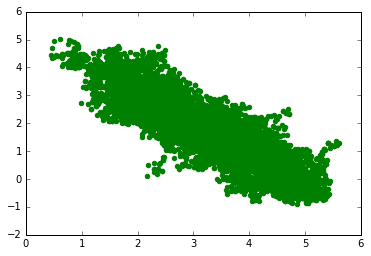

In [26]:
plt.scatter(x1, y1, color = 'g')

(array([ 112.,  460., 1097.,  870., 1237.,  869.,  355.]),
 array([0.45039718, 1.18700197, 1.92360676, 2.66021155, 3.39681634,
        4.13342113, 4.87002592, 5.60663071]),
 <a list of 7 Patch objects>)

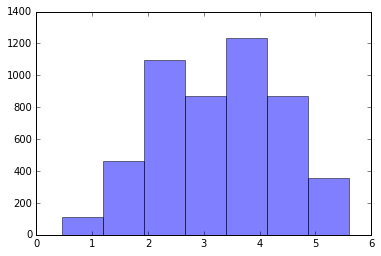

In [27]:
plt.hist(x1[int(Nmuestras/2):], alpha = 0.5, label = 'Walker_1', bins=7)

In [ ]:
omg_true = 0.290
H_true = 3
lnf_true = 0.0
H_ini,omg_ini,lnf_ini=50,0.5,0.5
nll = lambda * args: -lnlh(*args)
bounds=((74.0,84.0),(0.1,0.3),(0.0,1.0))
result = op.minimize(nll, [H_ini,omg_ini,lnf_ini], args=(z),bounds = bounds)
H_ml,omg_ml,lnf_ml=result["x"]

In [ ]:
ndim, nwalkers = 3, 100
pos = [result["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]